<a href="https://colab.research.google.com/github/Minahil-official/Quater-2/blob/main/first_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import userdata
gemini_api_key= userdata.get('GOOGLE_API_KEY_2')

In [3]:
!pip install langchain_google_genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.1 MB/s eta 0:00:00


In [4]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.prompts import PromptTemplate


In [5]:
initial_prompt = PromptTemplate(
    input_variables = ["question"],
    template = "change the {question} to a image generation prompt"
)
second_promt = PromptTemplate(
    input_variables = ["initial_response"],
    template = "read this {first_response} and summarize this into 2 lines for best image genaration!"
)


In [6]:
llm = ChatGoogleGenerativeAI(
    api_key = gemini_api_key,
    model = "gemini-1.5-flash",
    temperature = 0.5
)

In [7]:
first_chain = initial_prompt | llm
second_chain = second_promt | llm


In [8]:
from diffusers import StableDiffusionPipeline
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [9]:
first_response = first_chain.invoke({"question" : input("type anything : ")})
print("first_chain " , first_response)

second_response = second_chain.invoke({"first_response" : first_response})
print("second_chain " , second_response)

# Pass the refined prompt to the Stable Diffusion pipeline
print("\nGenerating the image ...")

# Load the Stable Diffusion pipeline
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")

# Use GPU if available
if torch.cuda.is_available():
    pipe.to("cuda")

# Generate the image using the refined prompt
image = pipe(first_response.content).images[0]


# Save the generated image
image.save("refined_generated_image.png")
print("Image generated and saved as 'refined_generated_image.png'")

type anything : tell me about a car
first_chain  content="Several options, depending on the kind of car you want:\n\n**Option 1 (General):**\n\n> A photorealistic image of a sleek, modern sports car, driving down a winding coastal road at sunset.  The car is a vibrant red, with chrome accents.  8k resolution, hyperrealistic, octane render.\n\n**Option 2 (Specific Make/Model):**\n\n> A photorealistic image of a 1967 Ford Mustang GT 500,  in Highland Green, parked in a classic American diner parking lot at night.  Rain is gently falling.  Detailed interior visible through the window. 8k resolution, cinematic lighting.\n\n**Option 3 (Abstract/Artistic):**\n\n> An abstract painting of a car, using bold colors and dynamic brushstrokes. The car is implied rather than explicitly shown, conveying a sense of speed and freedom.  Art Deco style, vibrant colors.\n\n\n**Option 4 (Focus on a specific feature):**\n\n> A close-up, highly detailed image of a car's engine, gleaming chrome and polished m

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (283 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["a photorealistic image of a 1 9 6 7 ford mustang gt 5 0 0 , in highland green , parked in a classic american diner parking lot at night . rain is gently falling . detailed interior visible through the window . 8 k resolution , cinematic lighting . ** option 3 ( abstract / artistic ):** > an abstract painting of a car , using bold colors and dynamic brushstrokes . the car is implied rather than explicitly shown , conveying a sense of speed and freedom . art deco style , vibrant colors . ** option 4 ( focus on a specific feature ):** > a close - up , highly detailed image of a car 's engine , gleaming chrome and polished metal . the image should emphasize the intricate mechanical details . photorealistic , 

  0%|          | 0/50 [00:00<?, ?it/s]

Image generated and saved as 'refined_generated_image.png'


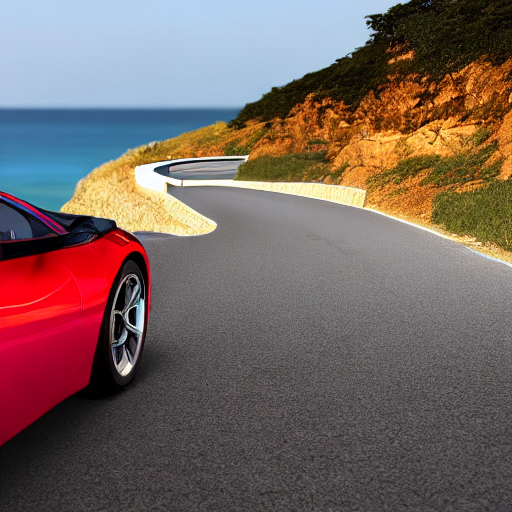

In [11]:
image